# Sales Trend Analysis

This notebook analyzes the `train.parquet` dataset to identify trends, cycles, and seasonality in sales data.

## Goals:
1.  **Global Trend**: Identify the "pulse" of the business.
2.  **Weekly Seasonality**: Analyze sales patterns by weekday.
3.  **Yearly Seasonality**: Analyze sales patterns by month.

In [1]:
import os
script_dir = os.getcwd()
FOLDER_PATH_DATA = os.path.join(script_dir, "..", "ETL Process", "final_optimized.parquet")
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid")

# Connect to DuckDB
con = duckdb.connect()

## 1. Global Trend (The "Pulse")
We aggregate sales by day number to visualize the overall trend and identify anomalies like the "Christmas Gaps".

Analyzing Global Trend...


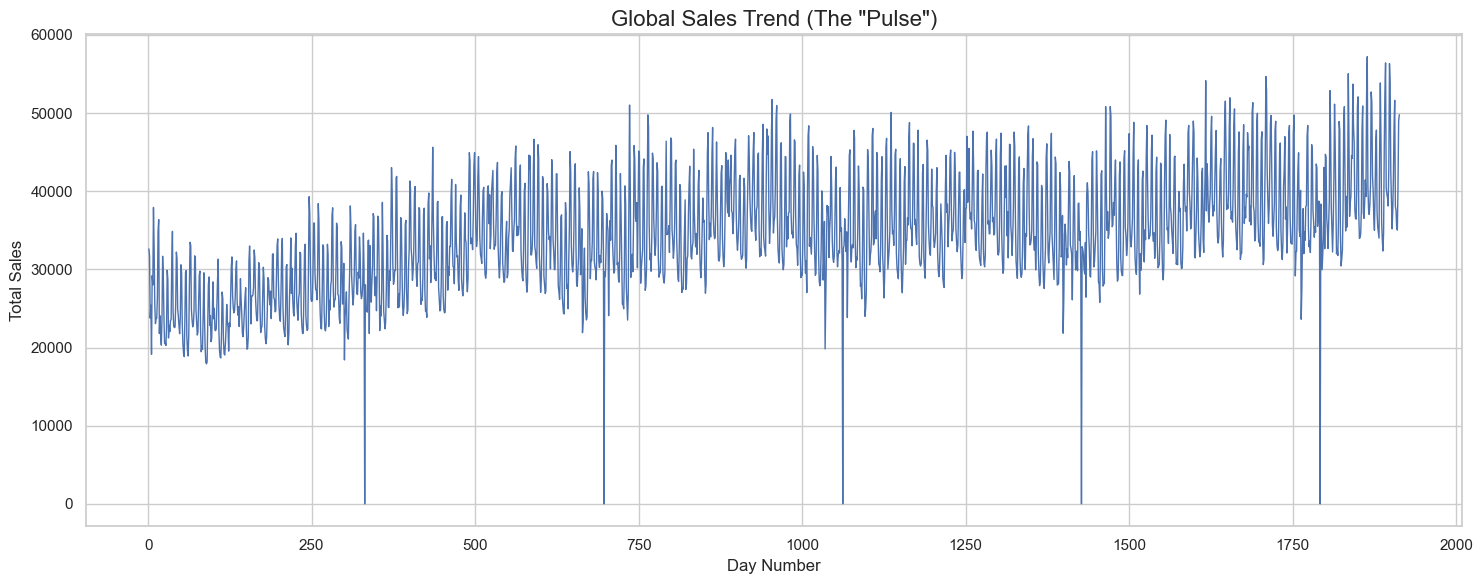

In [2]:
def analyze_global_trend(con):
    print("Analyzing Global Trend...")
    query = """
    SELECT 
        CAST(SUBSTR(d, 3) AS INTEGER) as day_num, 
        SUM(sales) as total_sales 
    FROM '""" + FOLDER_PATH_DATA + """' 
    GROUP BY day_num 
    ORDER BY day_num
    """
    df = con.sql(query).df()
    
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=df, x='day_num', y='total_sales', linewidth=1)
    plt.title('Global Sales Trend (The "Pulse")', fontsize=16)
    plt.xlabel('Day Number', fontsize=12)
    plt.ylabel('Total Sales', fontsize=12)
    plt.tight_layout()
    plt.show()

analyze_global_trend(con)

## 2. Weekly Seasonality
We calculate the average sales for each weekday to understand weekly cycles.

Analyzing Weekly Seasonality...


C:\Users\DELL\AppData\Local\Temp\ipykernel_7236\3223350242.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='wday', y='avg_sales', palette='viridis')


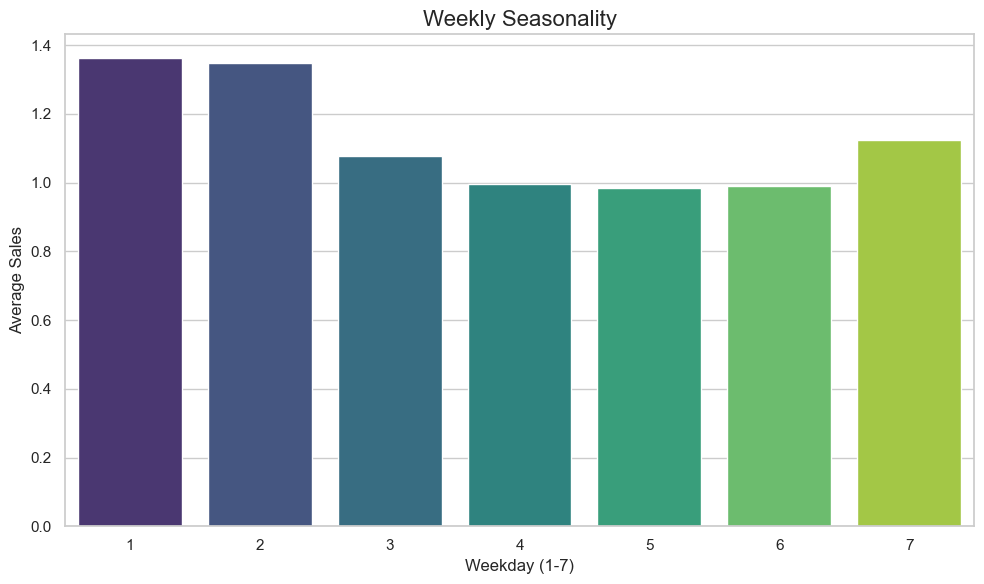

In [3]:
def analyze_weekly_seasonality(con):
    print("Analyzing Weekly Seasonality...")
    query = """
    SELECT 
        wday, 
        AVG(sales) as avg_sales 
    FROM '""" + FOLDER_PATH_DATA + """' 
    GROUP BY wday 
    ORDER BY wday
    """
    df = con.sql(query).df()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='wday', y='avg_sales', palette='viridis')
    plt.title('Weekly Seasonality', fontsize=16)
    plt.xlabel('Weekday (1-7)', fontsize=12)
    plt.ylabel('Average Sales', fontsize=12)
    plt.tight_layout()
    plt.show()

analyze_weekly_seasonality(con)

## 3. Yearly Seasonality
We calculate the average sales per month to identify seasonal peaks and troughs.

Analyzing Yearly Seasonality...


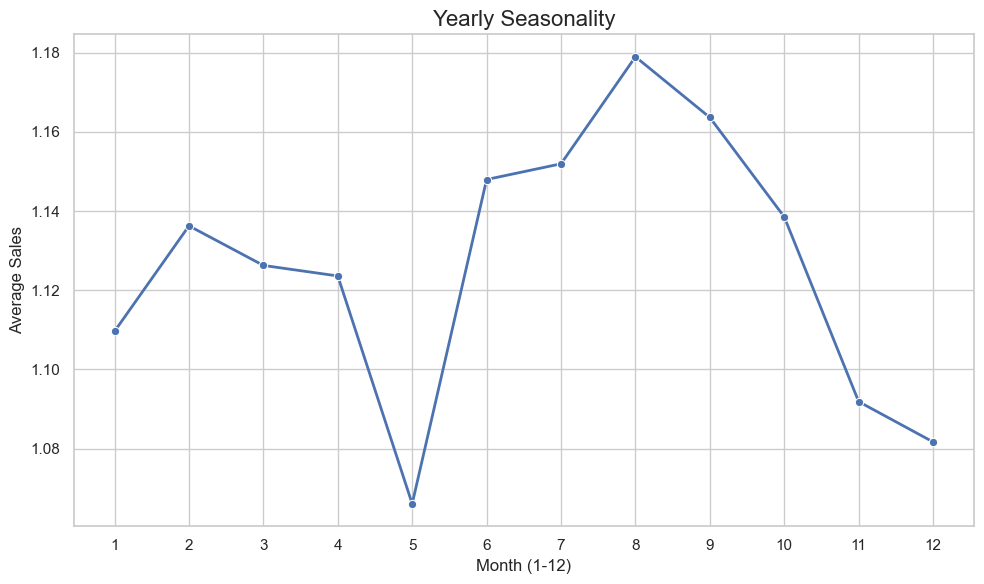

In [4]:
def analyze_yearly_seasonality(con):
    print("Analyzing Yearly Seasonality...")
    query = """
    SELECT 
        month, 
        AVG(sales) as avg_sales 
    FROM '""" + FOLDER_PATH_DATA + """' 
    GROUP BY month 
    ORDER BY month
    """
    df = con.sql(query).df()
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='month', y='avg_sales', marker='o', linewidth=2)
    plt.title('Yearly Seasonality', fontsize=16)
    plt.xlabel('Month (1-12)', fontsize=12)
    plt.ylabel('Average Sales', fontsize=12)
    plt.xticks(range(1, 13))
    plt.tight_layout()
    plt.show()

analyze_yearly_seasonality(con)